# Exercise 1
Coursera - Machine Learning <br/>
Andrew Ng

## Single Variable

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import itertools
import pandas as pd

### Basic Function

In [123]:
# Create 5 x 5 Identity Matrix
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Plotting

In [124]:
# Convert .txt database file into .csv file
# On second thought I don't think it's needed
# Alternative for opening file
# with open('ex1data1.txt', 'r') as in_file:
#     stripped = (line.strip() for line in in_file)
#     lines = (line.split(",") for line in stripped if line)
#     with open('ex1data1.csv','w') as out_file:
#               writer = csv.writer(out_file)
#               writer.writerow(('x', 'y'))
#               writer.writerows(lines)


In [125]:
# Reading the CSV into a pandas DataFrame

df = pd.read_csv('ex1data1.txt', header = None, sep = ',')
print(df)

          0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


In [126]:
print(df)

          0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


In [127]:
X = df.iloc[:, 0]
y = df.iloc[:, 1]
print(X)
print("\n")
print(y)

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
       ...   
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: 0, Length: 97, dtype: float64


0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: 1, Length: 97, dtype: float64


In [128]:
def plotData(x, y):
    font = {'size' : 20}
    plt.figure(figsize=(15, 8), dpi=50, facecolor='w')
    plt.scatter(x, y, color='red', marker='x', s=144)
    plt.rc('font', **font)
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000')
    plt.axis([4, 25, -5, 25])
    plt.show()

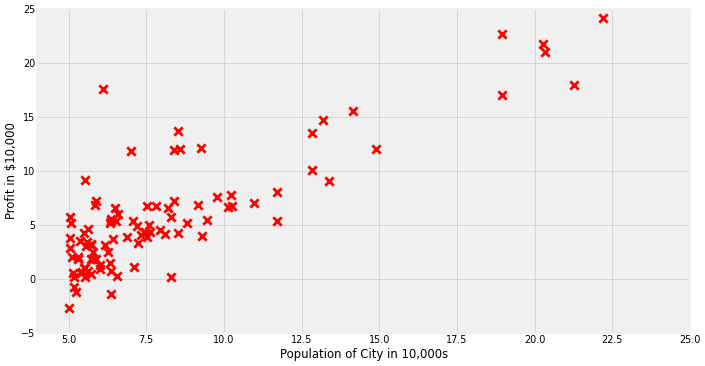

In [129]:
plotData(X, y)

### Cost and Gradient Descent

In [130]:
# number of dataset
m = len(y)
m

97

In [131]:
# When dealing with matrix array operation it's better to have rank of two or ndim = 2, thus
X = np.array(X)[:, np.newaxis]
y = np.array(y)[:, np.newaxis]

In [132]:
X.ndim

2

In [133]:
X.shape

(97, 1)

In [134]:
# Adding intercept term (bias) to array X
ones = np.ones([m, 1])
X = np.hstack([ones, X])

In [135]:
# Define alpha value (learning rate) and max iteration
a = 0.001
iteration = 1500

In [136]:
# Prepare matrix to hold theta values
theta = np.zeros([2, 1])
theta

array([[0.],
       [0.]])

### Cost Function
<img src = ".\img\cost-funct-basic.PNG">
<!-- ![](cost-funct-basic.png) -->

In [137]:
# Define computeCost function
def computeCost(X, y, theta):
    const = 1/(2*m)
    temp = np.matmul(X, theta) - y
    J = const * np.sum(np.power(temp,2))
    return J

In [138]:
# Peek X
X[:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [139]:
# Calculate computeCost with theta [0; 0]
J1 = computeCost(X, y, theta)
print("With theta = [0 ; 0], \nCost computed = %.2f " %J1)

With theta = [0 ; 0], 
Cost computed = 32.07 


In [140]:
# Calculate computeCost with theta [-1; 2]
theta1 = np.array([-1, 2])
theta1 = theta1[:, np.newaxis]
J2 = computeCost(X, y, theta1)
print("With theta [-1, 2], \n Cost computed: %.2f" %J2) 

With theta [-1, 2], 
 Cost computed: 54.24


### Gradient Descent
<img src = ../img/grad-descent-basic.png>

In [141]:
# Variable for gradient descent
# Learning rate and iteration
alpha = 0.01
iteration = 1500

In [142]:
theta = np.zeros([2, 1])
def gradientDescent(X, y, theta, alpha):
    J_hist = np.zeros([iteration, 1])
    for t in range(iteration):
        temp = (np.dot(X, theta) - y)
        temp = np.dot(X.T, temp)
        temp = alpha/m * temp
        
        
        
        theta = theta - temp
        J_hist[t] = computeCost(X, y, theta)
    return theta, J_hist

In [143]:
theta, J_hist = gradientDescent(X, y, theta, alpha)

In [144]:
theta

array([[-3.63029144],
       [ 1.16636235]])

In [145]:
J_hist

array([[6.73719046],
       [5.93159357],
       [5.90115471],
       ...,
       [4.48343473],
       [4.48341145],
       [4.48338826]])

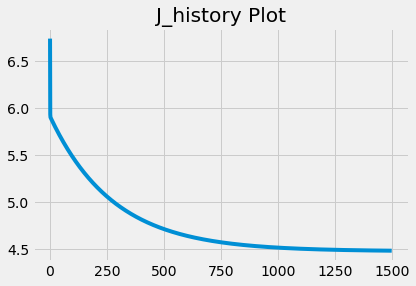

In [146]:
# Checks to see whether J_hist decrease each iteration
plt.style.use('fivethirtyeight')
plt.title("J_history Plot")
plt.plot(J_hist)

### Plotting Linear Regression

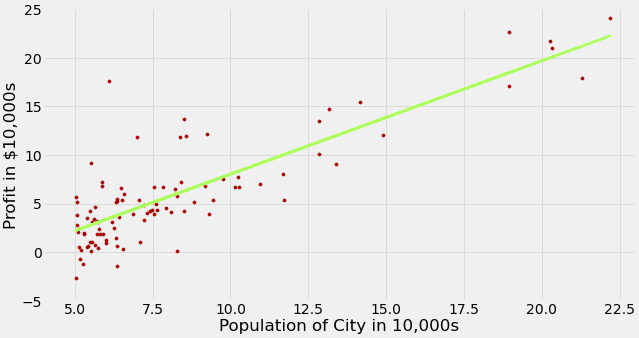

In [147]:
# Plot the linear fit
plt.figure(figsize=(17, 9), dpi=40)
font = {'size' : 25}
plt.rc('font', **font)
plt.scatter(X[:, [1]], y, color = '#aa0000')
plt.plot(X[:, [1]], np.dot(X, theta), color = '#adff5d')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.axis([4, 23, -5, 25])
plt.show()

In [148]:
# Predict values for population sizes of 35,000 and 70,000
theta_pred1 = np.array([1, 3.5])
predict1 = np.dot(theta_pred1, theta)
print("For population = 35,000, we predict a profit of %.5f" %(predict1*10000))

For population = 35,000, we predict a profit of 4519.76787


In [149]:
# Predict values for population sizes of 35,000 and 70,000
theta_pred2 = np.array([1, 7])
predict2 = np.dot(theta_pred2, theta)
print("For population = 70,000, we predict a profit of %.5f" %(predict2*10000))

For population = 70,000, we predict a profit of 45342.45013


### Visualizing J (θ)

In [150]:
# Save it for later let's try multivariate first

## Multiple Variable

### Feature Normalization

In [151]:
# Load data
df = pd.read_csv("ex1data2.txt", header=None, sep=",")
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [152]:
type(df)

pandas.core.frame.DataFrame

In [153]:
X = df.iloc[:, 0]

In [154]:
type(X)

pandas.core.series.Series

In [155]:
X = df.iloc[:,0:2].to_numpy()
y = df.iloc[:, 2].to_numpy()
y = y[:, np.newaxis]
print(X[:10])
print("\n")
print(y[:10])

[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]]


[[399900]
 [329900]
 [369000]
 [232000]
 [539900]
 [299900]
 [314900]
 [198999]
 [212000]
 [242500]]


In [156]:
def featureNormalize(X):
    m, n = X.shape
    X_mean = []
    X_std = []
    for i in range(n):
        X_mean.append(np.mean(X[:, i]))
        X_std.append(np.std(X[:, i], ddof=1))
    
    X = (X - X_mean)/X_std
    
    return X

In [157]:
X_norm = featureNormalize(X)

In [158]:
X_norm[:10]

array([[ 0.13000987, -0.22367519],
       [-0.50418984, -0.22367519],
       [ 0.50247636, -0.22367519],
       [-0.73572306, -1.53776691],
       [ 1.25747602,  1.09041654],
       [-0.01973173,  1.09041654],
       [-0.5872398 , -0.22367519],
       [-0.7218814 , -0.22367519],
       [-0.78102304, -0.22367519],
       [-0.63757311, -0.22367519]])

In [159]:
len(X_norm)

47

In [160]:
# Adding intercept/biar term (matrix of ones) to newly normalized X
ones = np.ones([len(X_norm), 1])
X_norm = np.hstack([ones, X_norm])

In [161]:
X_norm[:10]

array([[ 1.        ,  0.13000987, -0.22367519],
       [ 1.        , -0.50418984, -0.22367519],
       [ 1.        ,  0.50247636, -0.22367519],
       [ 1.        , -0.73572306, -1.53776691],
       [ 1.        ,  1.25747602,  1.09041654],
       [ 1.        , -0.01973173,  1.09041654],
       [ 1.        , -0.5872398 , -0.22367519],
       [ 1.        , -0.7218814 , -0.22367519],
       [ 1.        , -0.78102304, -0.22367519],
       [ 1.        , -0.63757311, -0.22367519]])

In [162]:
type(X)

numpy.ndarray

In [163]:
# Initialize new 3x1 theta matrix for X_norm
theta = np.zeros([3, 1])

### Gradient Descent Multiple Variables

In [164]:
# First to calculate J_history, computeCostMulti is necessary
def computeCostMulti(X, y, theta):
    m, n = X.shape
    temp1 = np.dot(X_norm, theta)-y
    J = 1/(2*m) * np.sum(np.power(temp1, 2))
    return J 

In [165]:
J_multi_test = computeCostMulti(X_norm, y, theta)

In [166]:
J_multi_test

65591548106.45744

In [167]:
# Define alpha and iteration value for gradient descent
alpha = 0.01
num_iters = 400

In [168]:
# Now define gradientDescentMulti
theta = np.zeros([3, 1])
def gradDescentMulti(X, y, theta, alpha, iteration):
    m, n = X.shape # m, number of dataset and n, number of features of X_norm
    J_hist = np.zeros([iteration, 1])
    for t in range(num_iters):
        temp = (np.dot(X, theta) - y)
        temp = np.dot(X.T, temp)
        temp = alpha/m * temp
        theta = theta - temp
        J_hist[t] = computeCostMulti(X, y, theta)
    return theta, J_hist

In [169]:
theta, J_hist = gradDescentMulti(X_norm, y, theta, alpha, num_iters)

In [170]:
J_hist[:10]

array([[6.43007496e+10],
       [6.30367950e+10],
       [6.17991118e+10],
       [6.05871404e+10],
       [5.94003332e+10],
       [5.82381546e+10],
       [5.71000810e+10],
       [5.59856000e+10],
       [5.48942105e+10],
       [5.38254223e+10]])

In [171]:
theta

array([[334302.06399328],
       [100087.11600585],
       [  3673.54845093]])

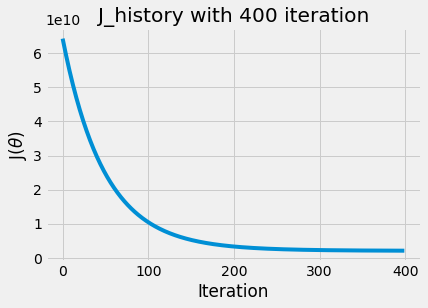

In [172]:
# Plot J history for multiple variables
plt.style.use('fivethirtyeight')

plt.plot(range(num_iters), J_hist)
plt.xlabel("Iteration")
plt.ylabel(r'J($\theta$)')
plt.title("J_history with 400 iteration")
plt.show()

In [173]:
J_hist.shape

(400, 1)

In [174]:
print('Theta computed from gradient descent multiple features with learning rate of %.3f:' %alpha)
np.printoptions(precision=3, suppress=True)
print(theta)

Theta computed from gradient descent multiple features with learning rate of 0.010:
[[334302.06399328]
 [100087.11600585]
 [  3673.54845093]]


In [175]:
# Estimate the house with 1650 sq-ft and 3 br
# Theta0*1 + Theta1*1650 + Theta2*3
housefeat = np.array([[1, 1650, 3]]).reshape(3, 1)
price = np.dot(np.transpose(theta), housefeat)
price

array([[1.65489064e+08]])

In [176]:
house_price = price.item()
house_price

165489064.11899266

In [177]:
# Then the estimated house price with 1650-sq ft and 3 br is
print('Estimated house price: %.3f' %house_price)

Estimated house price: 165489064.119


### Normal Equations

In [189]:
df = pd.read_csv('ex1data2.txt', header = None, sep = ',')

In [190]:
X = df.iloc[:, 0:2].to_numpy()
y = df.iloc[:, 2].to_numpy()

In [192]:
X[:10]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4],
       [1985,    4],
       [1534,    3],
       [1427,    3],
       [1380,    3],
       [1494,    3]], dtype=int64)

In [193]:
y[:10]

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500], dtype=int64)

In [182]:
type(X)

numpy.ndarray

In [194]:
# Add intercept/bias term to matrix of X
X = np.insert(X, 0, 1, axis=1)
X[:10]

array([[   1, 2104,    3],
       [   1, 1600,    3],
       [   1, 2400,    3],
       [   1, 1416,    2],
       [   1, 3000,    4],
       [   1, 1985,    4],
       [   1, 1534,    3],
       [   1, 1427,    3],
       [   1, 1380,    3],
       [   1, 1494,    3]], dtype=int64)

In [197]:
def normalEqn(X, y):
    X_t = X.transpose()
    temp = np.dot(X_t, X)
    theta = np.dot(np.dot(np.linalg.pinv(temp), X_t), y)
    return theta

In [198]:
# Calclate theta using normal equation and convert it into 2 dimension using ndmin
theta = normalEqn(X, y)
theta = np.array(theta, ndmin = 2)
theta

array([[89597.90954361,   139.21067402, -8738.01911255]])

In [199]:
theta.shape

(1, 3)

In [200]:
print('Theta obtained from the normal equation are', theta)

Theta obtained from the normal equation are [[89597.90954361   139.21067402 -8738.01911255]]


In [201]:
# Estimate the house with 1650 sq-ft and 3 br
# Theta0*1 + Theta1*1650 + Theta2*3
housefeat = np.array([[1, 1650, 3]]).reshape(3, 1)
price = np.dot(theta, housefeat)
price

array([[293081.46433499]])

In [202]:
house_price = price.item()
house_price

293081.4643349892

In [203]:
# Then the estimated house price with 1650-sq ft and 3 br is
print('Estimated house price: %.3f' %house_price)

Estimated house price: 293081.464
